In [ ]:
# ADX Value	Trend Strength
# 0-25	Absent or Weak Trend
# 25-50	Strong Trend
# 50-75	Very Strong Trend
# 75-100	Extremely Strong Trend


In [1]:
# packages
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

In [33]:
# reading in data from file
df = pd.read_csv("./data/01_25_21_0800.csv", index_col=0)
df = df.drop(index="GOOS", axis=0)

In [53]:
# collect all trending stocks in trending_df
df = df.sort_values(by=["trending"], axis=0, ascending=False)
trending_df = pd.DataFrame()

for index, row in df.iterrows():
    if(row["trending"]):
        trending_df = trending_df.append(row)


In [55]:
cols = ["beta", "c", "o", "adx", "volume_10_day", "shareOutstanding", "signal", "trending", "bearish", "bullish"]
trending_df = trending_df[cols]
display(trending_df.sort_values(by=["adx"], axis=0, ascending=False))

,beta,c,o,adx,volume_10_day,shareOutstanding,signal,trending,bearish,bullish
GRWG,3.12335,49.84,48.1600,74.077543,3.63656,36.88,buy,1.0,0.0000,1.0000
SNAP,1.29161,53.57,53.9000,62.976764,19.07045,1415.80,strong buy,1.0,0.0000,1.0000
PLUG,1.71386,66.87,62.3000,59.676549,77.23934,303.38,strong buy,1.0,0.2500,0.7500
DAR,1.28887,66.78,66.6900,58.786458,1.37371,163.78,buy,1.0,0.5000,0.5000
GME,1.37064,65.01,42.5900,57.857005,34.07252,64.30,strong buy,1.0,0.5715,0.4285
ROKU,1.95563,422.85,422.0000,54.301020,5.58816,119.90,buy,1.0,0.0000,1.0000
SHAK,1.73000,111.21,107.2600,47.741585,1.08799,37.56,strong buy,1.0,0.5000,0.5000
NVDA,1.40356,548.50,549.6035,46.849504,8.66204,613.00,buy,1.0,0.0000,1.0000
AMD,2.19114,92.79,94.4200,43.169276,50.01342,1170.00,buy,1.0,0.2500,0.7500
SQ,2.58165,222.88,219.0000,42.632426,9.14422,432.80,buy,1.0,0.0000,1.0000


In [57]:
# stocks we're interested in getting options data
option_stocks = trending_df.sort_values(by=["beta"], axis=0, ascending=False)

for index, row in option_stocks.iterrows():
    # display stock name
    stock = index
    # get adx value
    adx = row['adx']
    bear = row['bearish']
    bull = row['bullish']
    display(stock)
    
    # initialize pandas dataframes for each expir. date
    op_interest = pd.DataFrame()
    
    # get current price of stock
    price = row['c']

    # get options dates
    s = yf.Ticker(str(index))
    try:
        dates = list(s.options)
    except:
        continue
    
    # get options data for first two dates
    for date in dates[:2]:
        # get options chain (call)
        call_chain = s.option_chain(date)[0]
#         put_chain = s.option_chain(date)[1]
#         comb_chain = call_chain.append(put_chain)
        
        # iterate through call chain
        for index, row in call_chain.iterrows():
            # get strike price
            strike = row['strike']

            # is the true value of the option less than (thresh) * (100) = $500 (in this case)?
            thresh = 5.0

            if abs(price-strike) < thresh:
                op_interest = op_interest.append(row, ignore_index=True)
                # is the volatility of the option greater than 20%?
#                 vol = row["impliedVolatility"]
#                 if float(vol) > .20:
#                     # add to option dataframe if conditions are met
#                     op_interest = op_interest.append(row, ignore_index=True)

    drop_list = ["ask", "bid", "contractSize", "currency", "inTheMoney", "lastTradeDate"]
    try:
        op_interest = op_interest.drop(drop_list, axis=1)
    except:
        pass
    
    if op_interest.empty:
#         pass
        print("No options of interest for " + str(stock) + " today.")
    else:
        display("-------------------------------------------------------------------")
        display("Current_Price: " + str(price))
        display("adx_Value: " + str(round(adx, 4)))
        display("bear : bull ~>> " + str(bear) + " : " + str(bull))
        display("-------------------------------------------------------------------")
        cols = ["contractSymbol", "lastPrice", "strike", "change", "impliedVolatility", "percentChange", "volume", "openInterest"]
        op_interest = op_interest[cols]
        display(op_interest.sort_values(by=["lastPrice"], axis=0, ascending=False))

'MRO'

'-------------------------------------------------------------------'

'Current_Price: 8.15'

'adx_Value: 28.8094'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,MRO210129C00003500,5.09,3.5,0.0,0.000010,0.0,NaN,2.0
1,MRO210129C00004000,3.85,4.0,0.0,0.000010,0.0,2.0,4.0
3,MRO210129C00005000,3.17,5.0,0.0,0.000010,0.0,1.0,59.0
2,MRO210129C00004500,3.05,4.5,0.0,0.000010,0.0,1.0,11.0
4,MRO210129C00005500,2.82,5.5,0.0,0.000010,0.0,1.0,27.0
19,MRO210205C00005000,2.60,5.0,0.0,0.000010,0.0,1.0,1.0
20,MRO210205C00005500,2.59,5.5,0.0,0.000010,0.0,4.0,5.0
21,MRO210205C00006000,2.14,6.0,0.0,0.000010,0.0,1.0,9.0
5,MRO210129C00006000,2.10,6.0,0.0,0.000010,0.0,50.0,63.0
6,MRO210129C00006500,1.74,6.5,0.0,0.000010,0.0,30.0,124.0


'GRWG'

'-------------------------------------------------------------------'

'Current_Price: 49.84'

'adx_Value: 74.0775'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
15,GRWG210205C00045000,5.75,45.0,0.0,0.000010,0.0,11.0,227.0
0,GRWG210129C00045000,5.30,45.0,0.0,0.000010,0.0,14.0,133.0
17,GRWG210205C00046000,5.29,46.0,0.0,0.000010,0.0,4.0,26.0
16,GRWG210205C00045500,5.20,45.5,0.0,0.000010,0.0,7.0,21.0
19,GRWG210205C00047000,4.75,47.0,0.0,0.000010,0.0,4.0,45.0
2,GRWG210129C00046000,4.71,46.0,0.0,0.000010,0.0,6.0,87.0
18,GRWG210205C00046500,4.50,46.5,0.0,0.000010,0.0,18.0,22.0
1,GRWG210129C00045500,4.40,45.5,0.0,0.000010,0.0,1.0,40.0
20,GRWG210205C00047500,4.32,47.5,0.0,0.000010,0.0,4.0,38.0
21,GRWG210205C00048000,4.10,48.0,0.0,0.000010,0.0,8.0,45.0


'SQ'

'-------------------------------------------------------------------'

'Current_Price: 222.88'

'adx_Value: 42.6324'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
4,SQ210205C00220000,10.20,220.0,0.0,0.000010,0.0,374.0,711.0
5,SQ210205C00222500,8.87,222.5,0.0,0.000010,0.0,353.0,324.0
6,SQ210205C00225000,7.71,225.0,0.0,0.015635,0.0,440.0,597.0
0,SQ210129C00220000,7.00,220.0,0.0,0.000010,0.0,2773.0,1462.0
7,SQ210205C00227500,6.73,227.5,0.0,0.031260,0.0,59.0,315.0
1,SQ210129C00222500,5.70,222.5,0.0,0.000010,0.0,1502.0,881.0
2,SQ210129C00225000,4.60,225.0,0.0,0.015635,0.0,2760.0,1676.0
3,SQ210129C00227500,3.65,227.5,0.0,0.031260,0.0,1058.0,1240.0


'OXY'

'-------------------------------------------------------------------'

'Current_Price: 21.49'

'adx_Value: 27.1931'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,OXY210129C00017000,4.37,17.0,0.0,0.000010,0.0,10.0,58.0
10,OXY210205C00017000,4.24,17.0,0.0,0.000010,0.0,1.0,5.0
11,OXY210205C00018000,3.35,18.0,0.0,0.000010,0.0,1.0,39.0
1,OXY210129C00018000,3.20,18.0,0.0,0.000010,0.0,39.0,380.0
2,OXY210129C00019000,2.46,19.0,0.0,0.000010,0.0,21.0,243.0
12,OXY210205C00019000,2.40,19.0,0.0,0.000010,0.0,12.0,31.0
13,OXY210205C00020000,1.86,20.0,0.0,0.000010,0.0,57.0,303.0
3,OXY210129C00020000,1.82,20.0,0.0,0.000010,0.0,233.0,1189.0
14,OXY210205C00021000,1.44,21.0,0.0,0.000010,0.0,79.0,302.0
4,OXY210129C00021000,1.14,21.0,0.0,0.000010,0.0,1191.0,1124.0


'CGC'

'-------------------------------------------------------------------'

'Current_Price: 33.8'

'adx_Value: 35.4186'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,CGC210129C00029000,4.80,29.0,0.0,0.000010,0.0,1.0,113.0
16,CGC210205C00029000,4.60,29.0,0.0,0.000010,0.0,6.0,136.0
17,CGC210205C00029500,4.60,29.5,0.0,0.000010,0.0,1.0,100.0
1,CGC210129C00029500,4.05,29.5,0.0,0.000010,0.0,5.0,146.0
18,CGC210205C00030000,3.90,30.0,0.0,0.000010,0.0,6.0,184.0
2,CGC210129C00030000,3.85,30.0,0.0,0.000010,0.0,16.0,525.0
19,CGC210205C00030500,3.51,30.5,0.0,0.000010,0.0,5.0,226.0
3,CGC210129C00030500,3.40,30.5,0.0,0.000010,0.0,4.0,172.0
21,CGC210205C00031500,3.05,31.5,0.0,0.000010,0.0,2.0,119.0
20,CGC210205C00031000,3.05,31.0,0.0,0.000010,0.0,3.0,131.0


'AMD'

'-------------------------------------------------------------------'

'Current_Price: 92.79'

'adx_Value: 43.1693'

'bear : bull ~>> 0.25 : 0.75'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
20,AMD210205C00088000,7.50,88.0,0.0,0.000010,0.0,63.0,360.0
21,AMD210205C00088500,7.19,88.5,0.0,0.000010,0.0,102.0,294.0
22,AMD210205C00089000,6.70,89.0,0.0,0.000010,0.0,177.0,656.0
0,AMD210129C00088000,6.65,88.0,0.0,0.000010,0.0,990.0,3674.0
23,AMD210205C00089500,6.52,89.5,0.0,0.000010,0.0,183.0,484.0
1,AMD210129C00088500,6.25,88.5,0.0,0.000010,0.0,477.0,748.0
24,AMD210205C00090000,6.20,90.0,0.0,0.000010,0.0,1256.0,3141.0
25,AMD210205C00090500,6.01,90.5,0.0,0.000010,0.0,172.0,540.0
2,AMD210129C00089000,5.90,89.0,0.0,0.000010,0.0,1458.0,2480.0
26,AMD210205C00091000,5.79,91.0,0.0,0.000010,0.0,807.0,1610.0


'CRON'

'-------------------------------------------------------------------'

'Current_Price: 10.65'

'adx_Value: 33.0091'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,CRON210129C00006000,4.50,6.0,0.0,0.000010,0.0,1.0,17.0
1,CRON210129C00006500,4.10,6.5,0.0,0.000010,0.0,6.0,11.0
22,CRON210205C00007000,3.90,7.0,0.0,0.000010,0.0,2.0,8.0
21,CRON210205C00006500,3.80,6.5,0.0,0.000010,0.0,1.0,14.0
20,CRON210205C00006000,3.75,6.0,0.0,0.000010,0.0,4.0,6.0
2,CRON210129C00007000,3.62,7.0,0.0,0.000010,0.0,1.0,215.0
23,CRON210205C00007500,3.30,7.5,0.0,0.000010,0.0,2.0,40.0
3,CRON210129C00007500,3.17,7.5,0.0,0.000010,0.0,1.0,130.0
4,CRON210129C00008000,2.90,8.0,0.0,0.000010,0.0,8.0,422.0
24,CRON210205C00008000,2.85,8.0,0.0,0.000010,0.0,3.0,337.0


'ROKU'

'-------------------------------------------------------------------'

'Current_Price: 422.85'

'adx_Value: 54.301'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
4,ROKU210205C00420000,19.00,420.0,0.0,0.000010,0.0,167.0,231.0
5,ROKU210205C00422500,16.84,422.5,0.0,0.000010,0.0,24.0,47.0
6,ROKU210205C00425000,16.20,425.0,0.0,0.007822,0.0,90.0,111.0
7,ROKU210205C00427500,15.15,427.5,0.0,0.015635,0.0,23.0,28.0
0,ROKU210129C00420000,13.22,420.0,0.0,0.000010,0.0,901.0,726.0
1,ROKU210129C00422500,11.95,422.5,0.0,0.000010,0.0,516.0,346.0
2,ROKU210129C00425000,10.89,425.0,0.0,0.015635,0.0,781.0,635.0
3,ROKU210129C00427500,9.77,427.5,0.0,0.031260,0.0,347.0,164.0


'DFS'

'-------------------------------------------------------------------'

'Current_Price: 92.27'

'adx_Value: 39.8027'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
18,DFS210205C00089000,11.30,89.0,0.0,0.000010,0.0,2.0,8.0
19,DFS210205C00089500,11.11,89.5,0.0,0.000010,0.0,4.0,3.0
16,DFS210205C00088000,11.05,88.0,0.0,0.000010,0.0,3.0,4.0
2,DFS210129C00088500,10.40,88.5,0.0,0.000010,0.0,1.0,8.0
4,DFS210129C00089500,9.50,89.5,0.0,0.000010,0.0,2.0,22.0
22,DFS210205C00091000,8.68,91.0,0.0,0.000010,0.0,10.0,13.0
21,DFS210205C00090500,6.40,90.5,0.0,0.000010,0.0,2.0,6.0
0,DFS210129C00087500,5.10,87.5,0.0,0.000010,0.0,1.0,10.0
1,DFS210129C00088000,4.40,88.0,0.0,0.000010,0.0,4.0,20.0
20,DFS210205C00090000,4.30,90.0,0.0,0.000010,0.0,5.0,9.0


'JACK'

'-------------------------------------------------------------------'

'Current_Price: 101.71'

'adx_Value: 28.5427'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
2,JACK210319C00100000,6.65,100.0,0.0,0.000010,0.0,2.0,59.0
3,JACK210319C00105000,4.80,105.0,0.0,0.015635,0.0,5.0,75.0
0,JACK210219C00100000,4.70,100.0,0.0,0.000010,0.0,2.0,188.0
1,JACK210219C00105000,3.20,105.0,0.0,0.031260,0.0,12.0,40.0


'SHAK'

'-------------------------------------------------------------------'

'Current_Price: 111.21'

'adx_Value: 47.7416'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
10,SHAK210205C00108000,6.34,108.0,0.0,0.000010,0.0,5.0,5.0
0,SHAK210129C00107000,5.70,107.0,0.0,0.000010,0.0,4.0,15.0
12,SHAK210205C00110000,5.00,110.0,0.0,0.000010,0.0,13.0,64.0
11,SHAK210205C00109000,4.95,109.0,0.0,0.000010,0.0,2.0,2.0
13,SHAK210205C00111000,4.18,111.0,0.0,0.000010,0.0,2.0,5.0
14,SHAK210205C00112000,3.90,112.0,0.0,0.015635,0.0,11.0,20.0
1,SHAK210129C00108000,3.75,108.0,0.0,0.000010,0.0,2.0,10.0
15,SHAK210205C00113000,3.45,113.0,0.0,0.031260,0.0,4.0,7.0
3,SHAK210129C00110000,3.42,110.0,0.0,0.000010,0.0,11.0,72.0
2,SHAK210129C00109000,3.40,109.0,0.0,0.000010,0.0,3.0,3.0


'PLUG'

'-------------------------------------------------------------------'

'Current_Price: 66.87'

'adx_Value: 59.6765'

'bear : bull ~>> 0.25 : 0.75'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
10,PLUG210205C00062000,8.40,62.0,0.0,0.000010,0.0,122.0,0.0
11,PLUG210205C00063000,7.85,63.0,0.0,0.000010,0.0,301.0,295.0
12,PLUG210205C00064000,7.05,64.0,0.0,0.000010,0.0,199.0,404.0
0,PLUG210129C00062000,6.95,62.0,0.0,0.000010,0.0,360.0,0.0
13,PLUG210205C00065000,6.80,65.0,0.0,0.000010,0.0,632.0,0.0
1,PLUG210129C00063000,6.35,63.0,0.0,0.000010,0.0,476.0,0.0
14,PLUG210205C00066000,6.35,66.0,0.0,0.000010,0.0,691.0,625.0
15,PLUG210205C00067000,5.80,67.0,0.0,0.003916,0.0,159.0,263.0
2,PLUG210129C00064000,5.67,64.0,0.0,0.000010,0.0,1695.0,1406.0
16,PLUG210205C00068000,5.25,68.0,0.0,0.031260,0.0,372.0,0.0


'SAVE'

'-------------------------------------------------------------------'

'Current_Price: 27.67'

'adx_Value: 25.7468'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
2,SAVE210319C00025000,4.31,25.0,0.0,0.000010,0.0,131.0,8120.0
0,SAVE210219C00025000,3.75,25.0,0.0,0.000010,0.0,159.0,2821.0
3,SAVE210319C00030000,2.07,30.0,0.0,0.062509,0.0,598.0,10563.0
1,SAVE210219C00030000,1.32,30.0,0.0,0.062509,0.0,1229.0,10374.0


'DD'

'-------------------------------------------------------------------'

'Current_Price: 81.09'

'adx_Value: 31.387'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
15,DD210205C00079000,6.15,79.0,0.0,0.000010,0.0,1.0,3.0
14,DD210205C00078000,5.75,78.0,0.0,0.000010,0.0,1.0,1.0
0,DD210129C00076500,5.05,76.5,0.0,0.000010,0.0,1.0,3.0
13,DD210205C00077000,4.60,77.0,0.0,0.000010,0.0,NaN,36.0
3,DD210129C00080000,4.50,80.0,0.0,0.000010,0.0,2.0,28.0
21,DD210205C00083000,3.40,83.0,0.0,0.031260,0.0,27.0,35.0
16,DD210205C00080000,3.40,80.0,0.0,0.000010,0.0,50.0,72.0
2,DD210129C00078000,3.16,78.0,0.0,0.000010,0.0,1.0,2.0
17,DD210205C00081000,2.75,81.0,0.0,0.000010,0.0,81.0,82.0
4,DD210129C00081000,2.40,81.0,0.0,0.000010,0.0,1.0,12.0


'JBLU'

'-------------------------------------------------------------------'

'Current_Price: 15.29'

'adx_Value: 27.1617'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
10,JBLU210319C00011000,4.23,11.0,0.0,0.000010,0.0,1.0,537.0
0,JBLU210219C00011000,4.14,11.0,0.0,0.000010,0.0,21.0,49.0
11,JBLU210319C00012000,3.35,12.0,0.0,0.000010,0.0,1.0,814.0
1,JBLU210219C00012000,3.20,12.0,0.0,0.000010,0.0,1.0,182.0
12,JBLU210319C00013000,2.68,13.0,0.0,0.000010,0.0,26.0,2633.0
2,JBLU210219C00013000,2.28,13.0,0.0,0.000010,0.0,37.0,170.0
13,JBLU210319C00014000,1.85,14.0,0.0,0.000010,0.0,82.0,1558.0
3,JBLU210219C00014000,1.61,14.0,0.0,0.000010,0.0,84.0,1049.0
14,JBLU210319C00015000,1.40,15.0,0.0,0.000010,0.0,248.0,3065.0
4,JBLU210219C00015000,1.08,15.0,0.0,0.000010,0.0,389.0,2646.0


'CURLF'

'BAC'

'-------------------------------------------------------------------'

'Current_Price: 31.55'

'adx_Value: 32.2801'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,BAC210129C00027000,4.83,27.0,0.0,0.000010,0.0,12.0,62.0
1,BAC210129C00027500,4.77,27.5,0.0,0.000010,0.0,3.0,61.0
19,BAC210205C00027000,4.61,27.0,0.0,0.000010,0.0,40.0,58.0
20,BAC210205C00027500,4.55,27.5,0.0,0.000010,0.0,1.0,5.0
21,BAC210205C00028000,3.75,28.0,0.0,0.000010,0.0,20.0,50.0
2,BAC210129C00028000,3.65,28.0,0.0,0.000010,0.0,6.0,2551.0
22,BAC210205C00028500,3.45,28.5,0.0,0.000010,0.0,6.0,61.0
3,BAC210129C00028500,3.15,28.5,0.0,0.000010,0.0,10.0,115.0
4,BAC210129C00029000,2.65,29.0,0.0,0.000010,0.0,75.0,554.0
23,BAC210205C00029000,2.62,29.0,0.0,0.000010,0.0,2.0,38.0


'ISR'

'DRI'

'-------------------------------------------------------------------'

'Current_Price: 121.98'

'adx_Value: 34.035'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
2,DRI210319C00120000,9.30,120.0,0.0,0.000010,0.0,1.0,3.0
0,DRI210219C00120000,6.54,120.0,0.0,0.000010,0.0,18.0,469.0
3,DRI210319C00125000,6.20,125.0,0.0,0.015635,0.0,9.0,134.0
1,DRI210219C00125000,3.90,125.0,0.0,0.031260,0.0,35.0,1152.0


'MS'

'-------------------------------------------------------------------'

'Current_Price: 74.13'

'adx_Value: 30.2656'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
10,MS210205C00070000,4.75,70.0,0.0,0.000010,0.0,2.0,71.0
0,MS210129C00070000,4.45,70.0,0.0,0.000010,0.0,595.0,889.0
11,MS210205C00071000,3.95,71.0,0.0,0.000010,0.0,47.0,45.0
1,MS210129C00071000,3.32,71.0,0.0,0.000010,0.0,1026.0,1038.0
12,MS210205C00072000,2.60,72.0,0.0,0.000010,0.0,35.0,47.0
2,MS210129C00072000,2.50,72.0,0.0,0.000010,0.0,533.0,729.0
13,MS210205C00073000,2.14,73.0,0.0,0.000010,0.0,55.0,101.0
14,MS210205C00074000,1.82,74.0,0.0,0.000010,0.0,93.0,152.0
3,MS210129C00073000,1.74,73.0,0.0,0.000010,0.0,1251.0,1101.0
15,MS210205C00075000,1.25,75.0,0.0,0.015635,0.0,142.0,757.0


'GS'

'-------------------------------------------------------------------'

'Current_Price: 289.39'

'adx_Value: 28.9284'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
4,GS210205C00285000,9.00,285.0,0.0,0.000010,0.0,14.0,156.0
5,GS210205C00287500,7.25,287.5,0.0,0.000010,0.0,62.0,116.0
0,GS210129C00285000,6.95,285.0,0.0,0.000010,0.0,719.0,650.0
6,GS210205C00290000,6.25,290.0,0.0,0.003916,0.0,56.0,323.0
1,GS210129C00287500,5.37,287.5,0.0,0.000010,0.0,336.0,364.0
7,GS210205C00292500,5.05,292.5,0.0,0.015635,0.0,13.0,71.0
2,GS210129C00290000,4.10,290.0,0.0,0.007822,0.0,1053.0,902.0
3,GS210129C00292500,3.10,292.5,0.0,0.031260,0.0,264.0,318.0


'AMAT'

'-------------------------------------------------------------------'

'Current_Price: 106.33'

'adx_Value: 32.9283'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
10,AMAT210205C00102000,6.90,102.0,0.0,0.000010,0.0,8.0,47.0
13,AMAT210205C00105000,5.85,105.0,0.0,0.000010,0.0,2.0,293.0
11,AMAT210205C00103000,5.37,103.0,0.0,0.000010,0.0,15.0,58.0
0,AMAT210129C00102000,5.30,102.0,0.0,0.000010,0.0,21.0,111.0
12,AMAT210205C00104000,4.85,104.0,0.0,0.000010,0.0,3.0,35.0
1,AMAT210129C00103000,4.58,103.0,0.0,0.000010,0.0,27.0,132.0
2,AMAT210129C00104000,3.90,104.0,0.0,0.000010,0.0,80.0,117.0
14,AMAT210205C00106000,3.55,106.0,0.0,0.000010,0.0,48.0,239.0
15,AMAT210205C00107000,3.11,107.0,0.0,0.007822,0.0,65.0,79.0
3,AMAT210129C00105000,3.00,105.0,0.0,0.000010,0.0,27.0,661.0


'NVDA'

'-------------------------------------------------------------------'

'Current_Price: 548.5'

'adx_Value: 46.8495'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
4,NVDA210205C00545000,18.18,545.0,0.0,0.000010,0.0,85.0,296.0
5,NVDA210205C00547500,16.90,547.5,0.0,0.000010,0.0,91.0,82.0
6,NVDA210205C00550000,15.85,550.0,0.0,0.003916,0.0,724.0,820.0
7,NVDA210205C00552500,14.60,552.5,0.0,0.007822,0.0,91.0,61.0
0,NVDA210129C00545000,12.85,545.0,0.0,0.000010,0.0,840.0,995.0
1,NVDA210129C00547500,11.35,547.5,0.0,0.000010,0.0,3009.0,747.0
2,NVDA210129C00550000,10.25,550.0,0.0,0.007822,0.0,3812.0,4136.0
3,NVDA210129C00552500,9.20,552.5,0.0,0.015635,0.0,1715.0,996.0


'GM'

'-------------------------------------------------------------------'

'Current_Price: 55.4'

'adx_Value: 41.4186'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
13,GM210205C00050500,5.40,50.5,0.0,0.000010,0.0,4.0,673.0
0,GM210129C00050500,5.02,50.5,0.0,0.000010,0.0,44.0,574.0
14,GM210205C00051000,5.00,51.0,0.0,0.000010,0.0,37.0,290.0
1,GM210129C00051000,4.60,51.0,0.0,0.000010,0.0,105.0,3884.0
16,GM210205C00052500,3.90,52.5,0.0,0.000010,0.0,10.0,79.0
15,GM210205C00052000,3.88,52.0,0.0,0.000010,0.0,43.0,197.0
2,GM210129C00052000,3.68,52.0,0.0,0.000010,0.0,136.0,2755.0
17,GM210205C00053000,3.50,53.0,0.0,0.000010,0.0,45.0,185.0
3,GM210129C00052500,3.27,52.5,0.0,0.000010,0.0,143.0,367.0
18,GM210205C00053500,3.00,53.5,0.0,0.000010,0.0,200.0,208.0


'GME'

'-------------------------------------------------------------------'

'Current_Price: 65.01'

'adx_Value: 57.857'

'bear : bull ~>> 0.5715 : 0.4285'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
2,GME210205C00070000,10.00,70.0,0.0,0.125009,0.0,11.0,10.0
0,GME210129C00065000,8.05,65.0,0.0,0.000010,0.0,383.0,286.0
1,GME210129C00070000,8.05,70.0,0.0,0.125009,0.0,314.0,261.0


'QCOM'

'-------------------------------------------------------------------'

'Current_Price: 162.42'

'adx_Value: 41.8874'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
4,QCOM210205C00157500,9.00,157.5,0.0,0.000010,0.0,42.0,247.0
5,QCOM210205C00160000,7.38,160.0,0.0,0.000010,0.0,194.0,366.0
0,QCOM210129C00157500,6.50,157.5,0.0,0.000010,0.0,136.0,576.0
6,QCOM210205C00162500,5.92,162.5,0.0,0.000987,0.0,230.0,617.0
7,QCOM210205C00165000,4.70,165.0,0.0,0.031260,0.0,308.0,779.0
1,QCOM210129C00160000,4.18,160.0,0.0,0.000010,0.0,228.0,792.0
2,QCOM210129C00162500,2.71,162.5,0.0,0.001963,0.0,592.0,1217.0
3,QCOM210129C00165000,1.77,165.0,0.0,0.031260,0.0,1311.0,1535.0


'CMG'

'-------------------------------------------------------------------'

'Current_Price: 1494.18'

'adx_Value: 28.0901'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
5,CMG210205C01492500,56.55,1492.5,0.0,0.000010,0.0,1.0,5.0
4,CMG210205C01490000,55.66,1490.0,0.0,0.000010,0.0,9.0,10.0
6,CMG210205C01495000,53.11,1495.0,0.0,0.000987,0.0,6.0,7.0
0,CMG210129C01490000,27.20,1490.0,0.0,0.000010,0.0,55.0,50.0
1,CMG210129C01492500,25.60,1492.5,0.0,0.000010,0.0,2.0,3.0
2,CMG210129C01495000,24.36,1495.0,0.0,0.001963,0.0,12.0,7.0
3,CMG210129C01497500,22.51,1497.5,0.0,0.003916,0.0,4.0,3.0


'SNAP'

'-------------------------------------------------------------------'

'Current_Price: 53.57'

'adx_Value: 62.9768'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
19,SNAP210205C00049500,6.73,49.5,0.0,0.000010,0.0,22.0,228.0
18,SNAP210205C00049000,6.73,49.0,0.0,0.000010,0.0,1.0,178.0
20,SNAP210205C00050000,6.32,50.0,0.0,0.000010,0.0,338.0,0.0
22,SNAP210205C00051000,5.75,51.0,0.0,0.000010,0.0,91.0,495.0
21,SNAP210205C00050500,5.75,50.5,0.0,0.000010,0.0,23.0,455.0
23,SNAP210205C00051500,5.55,51.5,0.0,0.000010,0.0,185.0,0.0
24,SNAP210205C00052000,5.17,52.0,0.0,0.000010,0.0,90.0,0.0
25,SNAP210205C00052500,4.95,52.5,0.0,0.000010,0.0,40.0,0.0
0,SNAP210129C00049000,4.75,49.0,0.0,0.000010,0.0,54.0,782.0
26,SNAP210205C00053000,4.70,53.0,0.0,0.000010,0.0,378.0,724.0


'DAR'

'-------------------------------------------------------------------'

'Current_Price: 66.78'

'adx_Value: 58.7865'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
2,DAR210319C00065000,5.10,65.0,0.0,0.000010,0.0,1.0,42.0
0,DAR210219C00065000,4.14,65.0,0.0,0.000010,0.0,61.0,281.0
3,DAR210319C00070000,3.50,70.0,0.0,0.031260,0.0,3.0,135.0
1,DAR210219C00070000,1.90,70.0,0.0,0.062509,0.0,17.0,700.0


'AAPL'

'-------------------------------------------------------------------'

'Current_Price: 139.07'

'adx_Value: 33.3549'

'bear : bull ~>> 0.2308 : 0.7692'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
10,AAPL210205C00135000,7.40,135.0,0.0,0.000010,0.0,5698.0,9208.0
11,AAPL210205C00136000,6.90,136.0,0.0,0.000010,0.0,4852.0,4222.0
0,AAPL210129C00135000,6.45,135.0,0.0,0.000010,0.0,34126.0,45911.0
12,AAPL210205C00137000,6.39,137.0,0.0,0.000010,0.0,6212.0,9568.0
1,AAPL210129C00136000,5.98,136.0,0.0,0.000010,0.0,15644.0,12840.0
13,AAPL210205C00138000,5.90,138.0,0.0,0.000010,0.0,6244.0,8398.0
14,AAPL210205C00139000,5.45,139.0,0.0,0.000010,0.0,2314.0,2603.0
2,AAPL210129C00137000,5.40,137.0,0.0,0.000010,0.0,29026.0,20138.0
15,AAPL210205C00140000,4.90,140.0,0.0,0.007822,0.0,13903.0,16210.0
3,AAPL210129C00138000,4.90,138.0,0.0,0.000010,0.0,30687.0,16802.0


'HLT'

'-------------------------------------------------------------------'

'Current_Price: 104.96'

'adx_Value: 26.9315'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
2,HLT210319C00100000,9.10,100.0,0.0,0.000010,0.0,5.0,6.0
0,HLT210219C00100000,7.08,100.0,0.0,0.000010,0.0,32.0,47.0
3,HLT210319C00105000,5.90,105.0,0.0,0.000498,0.0,35.0,51.0
1,HLT210219C00105000,4.20,105.0,0.0,0.000987,0.0,26.0,202.0


'MU'

'-------------------------------------------------------------------'

'Current_Price: 82.28'

'adx_Value: 40.1254'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
14,MU210205C00077500,5.80,77.5,0.0,0.000010,0.0,112.0,287.0
15,MU210205C00078500,5.15,78.5,0.0,0.000010,0.0,7.0,165.0
0,MU210129C00077500,5.15,77.5,0.0,0.000010,0.0,28.0,210.0
1,MU210129C00078000,4.75,78.0,0.0,0.000010,0.0,30.0,305.0
16,MU210205C00079000,4.60,79.0,0.0,0.000010,0.0,15.0,177.0
2,MU210129C00078500,4.33,78.5,0.0,0.000010,0.0,54.0,508.0
17,MU210205C00080000,4.00,80.0,0.0,0.000010,0.0,81.0,784.0
18,MU210205C00081000,3.33,81.0,0.0,0.000010,0.0,15.0,182.0
3,MU210129C00080000,3.20,80.0,0.0,0.000010,0.0,567.0,2643.0
19,MU210205C00081500,3.09,81.5,0.0,0.000010,0.0,5.0,151.0


'F'

'-------------------------------------------------------------------'

'Current_Price: 11.52'

'adx_Value: 42.102'

'bear : bull ~>> 0.0667 : 0.9333'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
18,F210205C00007000,4.64,7.0,0.0,0.000010,0.0,107.0,53.0
0,F210129C00007000,4.40,7.0,0.0,0.000010,0.0,4.0,220.0
19,F210205C00007500,4.00,7.5,0.0,0.000010,0.0,3.0,36.0
1,F210129C00007500,3.95,7.5,0.0,0.000010,0.0,6.0,144.0
2,F210129C00008000,3.54,8.0,0.0,0.000010,0.0,44.0,455.0
20,F210205C00008000,3.40,8.0,0.0,0.000010,0.0,10.0,151.0
3,F210129C00008500,3.05,8.5,0.0,0.000010,0.0,34.0,1251.0
21,F210205C00008500,3.01,8.5,0.0,0.000010,0.0,226.0,477.0
22,F210205C00009000,2.56,9.0,0.0,0.000010,0.0,138.0,2126.0
4,F210129C00009000,2.48,9.0,0.0,0.000010,0.0,221.0,3364.0


'JPM'

'-------------------------------------------------------------------'

'Current_Price: 133.79'

'adx_Value: 26.7135'

'bear : bull ~>> 0.2143 : 0.7857'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
10,JPM210205C00129000,6.90,129.0,0.0,0.000010,0.0,3.0,39.0
0,JPM210129C00129000,5.24,129.0,0.0,0.000010,0.0,64.0,113.0
11,JPM210205C00130000,5.22,130.0,0.0,0.000010,0.0,80.0,589.0
1,JPM210129C00130000,4.76,130.0,0.0,0.000010,0.0,39.0,556.0
12,JPM210205C00131000,4.67,131.0,0.0,0.000010,0.0,22.0,303.0
13,JPM210205C00132000,3.95,132.0,0.0,0.000010,0.0,10.0,125.0
2,JPM210129C00131000,3.70,131.0,0.0,0.000010,0.0,30.0,220.0
14,JPM210205C00133000,3.25,133.0,0.0,0.000010,0.0,200.0,205.0
3,JPM210129C00132000,3.10,132.0,0.0,0.000010,0.0,307.0,240.0
15,JPM210205C00134000,2.63,134.0,0.0,0.003916,0.0,766.0,459.0


'LUV'

'-------------------------------------------------------------------'

'Current_Price: 47.39'

'adx_Value: 35.8518'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,LUV210129C00042500,5.28,42.5,0.0,0.000010,0.0,2.0,222.0
20,LUV210205C00042500,5.05,42.5,0.0,0.000010,0.0,1.0,3.0
21,LUV210205C00043000,4.70,43.0,0.0,0.000010,0.0,3.0,2.0
23,LUV210205C00044000,4.55,44.0,0.0,0.000010,0.0,NaN,8.0
22,LUV210205C00043500,4.12,43.5,0.0,0.000010,0.0,1.0,3.0
1,LUV210129C00043000,4.02,43.0,0.0,0.000010,0.0,1.0,39.0
2,LUV210129C00043500,4.00,43.5,0.0,0.000010,0.0,1.0,2.0
3,LUV210129C00044000,3.75,44.0,0.0,0.000010,0.0,1.0,32.0
24,LUV210205C00044500,3.55,44.5,0.0,0.000010,0.0,1.0,3.0
4,LUV210129C00044500,3.05,44.5,0.0,0.000010,0.0,3.0,37.0


'DIS'

'-------------------------------------------------------------------'

'Current_Price: 172.78'

'adx_Value: 34.3875'

'bear : bull ~>> 0.1112 : 0.8888'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
4,DIS210205C00170000,5.67,170.0,0.0,0.000010,0.0,452.0,781.0
0,DIS210129C00170000,4.40,170.0,0.0,0.000010,0.0,1040.0,934.0
5,DIS210205C00172500,4.33,172.5,0.0,0.000010,0.0,411.0,891.0
6,DIS210205C00175000,3.15,175.0,0.0,0.015635,0.0,2240.0,2863.0
1,DIS210129C00172500,2.91,172.5,0.0,0.000010,0.0,2851.0,2777.0
7,DIS210205C00177500,2.30,177.5,0.0,0.031260,0.0,421.0,2573.0
2,DIS210129C00175000,1.80,175.0,0.0,0.031260,0.0,8978.0,4203.0
3,DIS210129C00177500,1.13,177.5,0.0,0.062509,0.0,2929.0,1584.0


'AMZN'

'-------------------------------------------------------------------'

'Current_Price: 3292.23'

'adx_Value: 33.2056'

'bear : bull ~>> 0.1924 : 0.8076'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
2,AMZN210205C03290000,115.45,3290.0,0.0,0.000010,0.0,173.0,1023.0
3,AMZN210205C03295000,115.00,3295.0,0.0,0.000987,0.0,172.0,247.0
0,AMZN210129C03290000,52.00,3290.0,0.0,0.000010,0.0,613.0,376.0
1,AMZN210129C03295000,49.92,3295.0,0.0,0.001963,0.0,815.0,379.0


'PYPL'

'-------------------------------------------------------------------'

'Current_Price: 252.0'

'adx_Value: 34.9013'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
4,PYPL210205C00247500,13.08,247.5,0.0,0.000010,0.0,291.0,961.0
5,PYPL210205C00250000,11.70,250.0,0.0,0.000010,0.0,901.0,1987.0
6,PYPL210205C00252500,10.71,252.5,0.0,0.003916,0.0,719.0,897.0
7,PYPL210205C00255000,9.38,255.0,0.0,0.015635,0.0,373.0,466.0
0,PYPL210129C00247500,6.85,247.5,0.0,0.000010,0.0,836.0,1866.0
1,PYPL210129C00250000,5.80,250.0,0.0,0.000010,0.0,4899.0,3421.0
2,PYPL210129C00252500,4.70,252.5,0.0,0.003916,0.0,2490.0,1436.0
3,PYPL210129C00255000,3.27,255.0,0.0,0.031260,0.0,6158.0,2565.0


'GE'

'-------------------------------------------------------------------'

'Current_Price: 11.11'

'adx_Value: 40.9896'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
20,GE210205C00006500,4.83,6.5,0.0,0.000010,0.0,5.0,5.0
0,GE210129C00006500,4.65,6.5,0.0,0.000010,0.0,23.0,3.0
1,GE210129C00007000,4.45,7.0,0.0,0.000010,0.0,1.0,2.0
21,GE210205C00007000,4.20,7.0,0.0,0.000010,0.0,1.0,27.0
22,GE210205C00007500,3.90,7.5,0.0,0.000010,0.0,4.0,5.0
2,GE210129C00007500,3.70,7.5,0.0,0.000010,0.0,7.0,29.0
23,GE210205C00008000,3.25,8.0,0.0,0.000010,0.0,5.0,407.0
3,GE210129C00008000,3.15,8.0,0.0,0.000010,0.0,1.0,89.0
24,GE210205C00008500,2.67,8.5,0.0,0.000010,0.0,21.0,75.0
4,GE210129C00008500,2.62,8.5,0.0,0.000010,0.0,1.0,85.0


'TXN'

'-------------------------------------------------------------------'

'Current_Price: 172.81'

'adx_Value: 41.1094'

'bear : bull ~>> 0.0 : 1.0'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
4,TXN210205C00170000,6.70,170.0,0.0,0.000010,0.0,5.0,172.0
0,TXN210129C00170000,5.75,170.0,0.0,0.000010,0.0,62.0,249.0
5,TXN210205C00172500,4.97,172.5,0.0,0.000010,0.0,31.0,204.0
1,TXN210129C00172500,4.22,172.5,0.0,0.000010,0.0,309.0,987.0
6,TXN210205C00175000,3.67,175.0,0.0,0.015635,0.0,66.0,181.0
2,TXN210129C00175000,3.15,175.0,0.0,0.031260,0.0,312.0,718.0
7,TXN210205C00177500,2.96,177.5,0.0,0.031260,0.0,9.0,63.0
3,TXN210129C00177500,2.39,177.5,0.0,0.062509,0.0,38.0,289.0


'AVGO'

'-------------------------------------------------------------------'

'Current_Price: 465.02'

'adx_Value: 34.6058'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
4,AVGO210205C00462500,11.30,462.5,0.0,0.000010,0.0,2.0,31.0
5,AVGO210205C00465000,10.00,465.0,0.0,0.000010,0.0,135.0,333.0
6,AVGO210205C00467500,9.40,467.5,0.0,0.007822,0.0,3.0,5.0
7,AVGO210205C00470000,8.10,470.0,0.0,0.015635,0.0,15.0,150.0
0,AVGO210129C00462500,7.30,462.5,0.0,0.000010,0.0,28.0,91.0
1,AVGO210129C00465000,6.27,465.0,0.0,0.000010,0.0,166.0,176.0
2,AVGO210129C00467500,4.90,467.5,0.0,0.015635,0.0,86.0,103.0
3,AVGO210129C00470000,4.31,470.0,0.0,0.031260,0.0,131.0,221.0


'RAD'

'-------------------------------------------------------------------'

'Current_Price: 19.78'

'adx_Value: 25.7966'

'bear : bull ~>> 0.5 : 0.5'

'-------------------------------------------------------------------'

,contractSymbol,lastPrice,strike,change,impliedVolatility,percentChange,volume,openInterest
0,RAD210129C00015000,3.95,15.0,0.0,0.000010,0.0,100.0,39.0
2,RAD210129C00016000,3.85,16.0,0.0,0.000010,0.0,2.0,5.0
21,RAD210205C00016000,3.60,16.0,0.0,0.000010,0.0,2.0,18.0
3,RAD210129C00016500,3.16,16.5,0.0,0.000010,0.0,3.0,29.0
4,RAD210129C00017000,3.00,17.0,0.0,0.000010,0.0,3.0,349.0
1,RAD210129C00015500,2.82,15.5,0.0,0.000010,0.0,2.0,14.0
22,RAD210205C00016500,2.45,16.5,0.0,0.000010,0.0,1.0,70.0
23,RAD210205C00017000,2.40,17.0,0.0,0.000010,0.0,1.0,19.0
5,RAD210129C00017500,2.32,17.5,0.0,0.000010,0.0,201.0,373.0
24,RAD210205C00017500,2.10,17.5,0.0,0.000010,0.0,1.0,71.0


In [ ]:
# plots

'-- adx --'

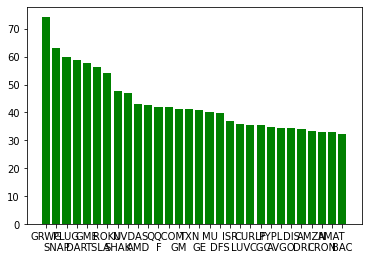

'-- volume_10_day --'

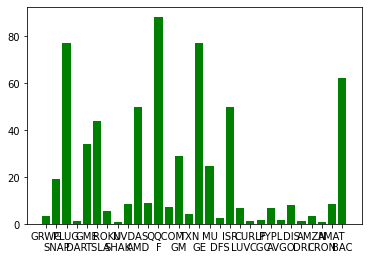

'-- beta --'

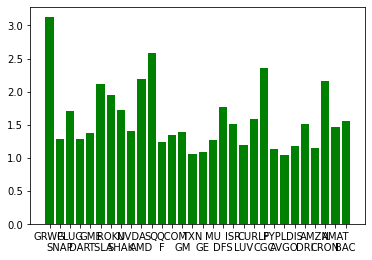

'-- shareOutstanding --'

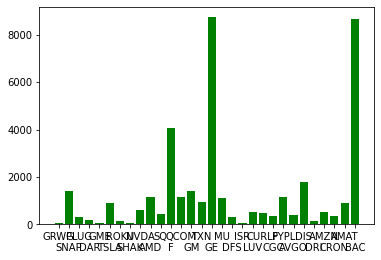

In [8]:
# plot for adx
display("-- adx --")
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["adx"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

display("-- volume_10_day --")
# plot for volume_10_day
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["volume_10_day"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

display("-- beta --")
# plot for beta
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["beta"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

display("-- shareOutstanding --")
# plot for shareOutstanding
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["shareOutstanding"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()